# Como definir explicitamente os valores do Boxplot utilizando o matplotlib

## Introdução

Suponha que você queria desenhar um boxplot utilizando o matplotlib, mas queira utilizar um método de estimação dos quartis diferente do método padrão. Como fazer? É isto que vamos ver neste artigo!

A documentação do matplotlib não deixa muito evidente qual método é utilizado para estimar os quartis para a construção do Boxplot através de `plt.boxplot()`. Em alguns testes (feitos por mim, ~~omitidos por pura conveniência~~ e disponibilizados no final do texto), os resultados obtidos são idênticos ao obtido utilizando a função `QUARTIL.INC()` do Excel (foram utilizados alguns datasets, com valores distintos e de tamanhos disitintos para combrir dados pares e ímpares). 

Portanto, consideramos o resultado padrão do `plt.boxplot()` como sendo o mesmo resultado do Boxplot gerado pelo Excel, quando marcado a opção "Inclusive" (neste momento, não tenho motivo para duvidar desta suposição). Então, vamos gerar o gráfico de boxplot utilizando o matplotlib, mas com os dados obtidos no Excel, utilizando a função `QUARTIL.EXC()`.

Assim, temos uma forma bem simples de validar os resultados.

## Conjunto de dados

Por motivos de facilidade ~~preguiça~~, vou utilizar o conjunto de dados do exemplo 1 do artigo da [Wikipedia-en](https://en.wikipedia.org/wiki/Quartile#Example_1) que trata sobre quartis. Os dados são os seguintes:

In [1]:
data = [6, 7, 15, 36, 39, 40, 41, 42, 43, 47, 49]

Um motivo bem específico para utilizar estes dados, é que ele é *ímpar*.

Utilizando as funções `QUARTIL.EXC()` e `QUARTIL.INC()` com este conjunto de dados, obtemos os seguintes valores para os quartis:

| Método | $Q1$ | $M_d$ | $Q3$ |
| :-: | :-: | :-: | :-: |
| `QUARTIL.INC()` | 25.5 | 40 | 42.5 |
| `QUARTIL.EXC()` | 15 | 40 | 43 |

Os resultados obtidos são bem distintos, especialmente o de $Q1$; logo, o Boxplot certamente será diferente. 

Para desenhar o Boxplot, além dos quartis e da mediana, precisamos da distância interquartílica e da posição dos whiskers. A distância interquartílica nada mais é do que a diferença entre os dois quartis:

$$DI=Q3-Q1$$

Já a posição dos whiskers, ela é calculada de uma forma um pouco mais complexa, pois depende da existência ou não possíveis outliers no conjunto de dados. A princípio, a posição do whisker inferior é o valor mínimo do conjunto de dados, e a posição do whiskers superior é o valor máximo do conjunto de dados. Entretanto, caso existam outliers (que são valores mínimos e/ou máximos), os whiskers passam a ser o próximo valor máximo e/ou mínimo.

Ou seja, a posição do whisker superior é o valor máximo que não é um outlier, e a posição do whisker inferior é o valor mínimo que não é um outlier.

Para verificar se existem outliers, se estima um intervalo de confiança da seguinte forma:

$$Inferior = Q1 - 1.5 \times DI$$

$$Superior = Q3 + 1.5 \times DI$$

Onde o $1.5$ é um numéro arbitrário, que pode ser alterado. Contudo, o uso de $1.5 \times DI$ ocorre devido a esta região abranger 99,3% dos dados de ums ditribuição Normal ($6 \sigma$), e é o valor recomendado. Valores fora do intervalo $[Q1 - 1.5 \times DI; Q3 + 1.5 \times DI]$ geralmente são considerados *outliers*. E é esta condição que vamos adotar aqui.

#### Para o método QUARTIL.INC(), temos que 

$$DI = 42.5 - 25.5 = 17$$

Então, o intervalo onde temos possíveis outliers é:

$$[Q1 - 1.5 \times DI;Q3 + 1.5 \times DI]$$

$$[25.5 - 1.5 \times 17;42.5 + 1.5 \times 17]$$

$$[0;68]$$

Como o conjunto de dados não tem nenhum ponto além deste intervalo, podemos dizer que não temos nenhum outlier, e então, utilizamos os valores mínimos e máximos como posição para o whisker inferior e superior, respectivamente.

#### Para o método QUARTIL.EXC(), temos que 

$$DI = 15 - 43 = 28$$

Então, o intervalo onde temos possíveis outliers é:

$$[Q1 - 1.5 \times DI;Q3 + 1.5 \times DI]$$

$$[15 - 1.5 \times 28;43 + 1.5 \times 28]$$

$$[-27;85]$$

Como o conjunto de dados não tem nenhum ponto além deste intervalo, não temos nenhum outlier, e então, utilizamos os valores mínimos e máximos como posição para o whisker inferior e superior, respectivamente.

Dessa forma, temos:

| Método | $whisker_{lower}$ | $Q1$ | $M_d$ | $Q3$ | $whisker_{upper}$ |
| :-: | :-: | :-: | :-: | :-: | :-: |
| `QUARTIL.INC()` | 6 | 25.5 | 40 | 42.5 | 49 |
| `QUARTIL.EXC()` | 6 | 15 | 40 | 43 | 49 |

A Figura abaixo mostra os gráficos obtidos utilizando o Excel.

<img src="https://raw.githubusercontent.com/andersonmdcanteli/random_stuff/main/comparacao_boxplot.PNG" width="600">

## Importações

Para desenhar e alterar o o Boxplot, precisamos importar o que realmente importa. Vamos precisar do `pyplot` do `matplotlib` para desenhar o Boxplot, e também do `cbook`, para poder alterar os valores do Boxplot.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

## Cook book do boxplot

Através do `cbook` temos acesso ao método `cbook.boxplot_stats()`, que retorna uma `list`, onde o primeiro elemento é um `dict` contendo os dados que são utilizados para desenhar o Boxplot. Dessa forma, consiguimos obter os valores estimados por padrão para o conjunto de dados que estamos utilizando:

In [3]:
cbook.boxplot_stats(data)

[{'mean': 33.18181818181818,
  'iqr': 17.0,
  'cilo': 31.95266221321949,
  'cihi': 48.04733778678051,
  'whishi': 49,
  'whislo': 6,
  'fliers': array([], dtype=int32),
  'q1': 25.5,
  'med': 40.0,
  'q3': 42.5}]

Você pode acessar a documentação do `cbook.boxplot_stats()` clicando [aqui](https://matplotlib.org/stable/api/cbook_api.html#matplotlib.cbook.boxplot_stats).

Para alterar os valores do Boxplot é necessário alterar as `keys` do `dict` que é retornado na primeira posição de `cbook.boxplot_stats()`. Se nada for alterado, o valor de $Q1$ que será utilizado é de $25.5$ e de $Q3$ é $42.5$, que são os valores obtidos utilizando o `QUARTIL.INC()` no Excel.

## Boxplot padrão

Para desenhar o Boxplot padrão do matplotlib, basta passar os dados para o método `plt.boxplot()`, como normalmente é feito. Ou seja:

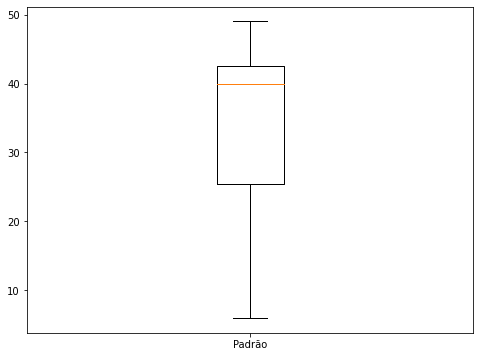

In [4]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot() 
ax.boxplot(data, labels=["Padrão"])
plt.show()

## Alterando os valores do Boxplot

Para alterar os valores do Boxplot, é necessário:

- obter os valores para um boxplot;

- substituir os valores acessados pelos valores desejados;

- plotar o boxplot com os novos valores;

Quais valores substituir? Bom, temos as seguintes possibilidades:

- 'mean' -> a média aritmética do conjunto de dados. Não é necessário substituir, pois a média não se altera com o método de estimação dos quartis. Além disso, a média só é inserida se `showmeans=True`. 
- 'iqr' -> é o intervalo interquartil. Necessário substituir pelo novo valor ($Q3-Q1$).
- 'cilo' -> é o valor do `notch` inferior. É necessário substituir apenas se `notch=True`. Veja a documentação para detalhes.
- 'cihi' -> é o valor do `notch` superior. É necessário substituir apenas se `notch=True`. Veja a documentação para detalhes.
- 'whishi' -> é o valor do `whisker` superior. Necessário substituir pelo novo valor caso existam outliers, o que não é o caso.
- 'whislo' -> é o valor do `whisker` inferior. Necessário substituir pelo novo valor caso existam outliers, o que não é o caso.
- 'fliers' -> é uma uma `list` que contém os valores dos possíveis outiliers. É necessário substituir apenas se existirem possíveis outliers (e.g., se existir valores menores do que $Q1-1.5\times(Q3-Q1)$ e/ou se existirem valores maiores que $Q3+1.5\times(Q3-Q1)$. Atente que, métodos diferentes resultam em outliers diferentes.
- 'q1' -> é o primeiro quartil. Necessário substituir por $Q1$.
- 'med'-> é a mediana. Não é necessário substituir, pois a mediana não muda, independentemente do método de estimação dos quartis.
- 'q3'-> é o terceirto quartil. Necessário substituir por $Q3$.

Também temos o parâmetro `label`, que é o label que é utilizado no eixo `x`.

Dessa forma:

In [5]:
q1 = 15
med = 40
q3 = 43
iqr = q3 - q1
whislo = 6
whishi = 49
label = 'QUARTIL.EXC()'

## Plotando o novo boxplot

Temos praticamente todas as informações necessárias para alterar os valores do Boxplot. Entretanto, não é possível passar estes novos valores diretamente para `plt.boxplot()`, como fizemos a pouco. Para desenhar um boxplot com os dados obtidos através do cook book (`cbook.boxplot_stats()`), devemos utilizar o `ax.bxp()` (ao invés de `plt.boxplot()`), passando as informações do boxplot dentro de uma `list`.

Agora, basta juntar todas as informações descritas acima:

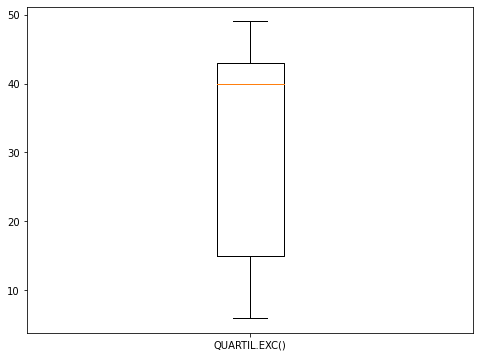

In [6]:
# criando o canvas
fig = plt.figure(figsize=(8,6))
# criando um eixo
ax = fig.add_subplot() 
# obtendo o cook book para os dados (observe que estamos acessando o primeiro item da lista, que é o dicionário do cook book)
boxplot_data = cbook.boxplot_stats(data)[0]

## substituindo os valores necessários
# primeiro quartil
boxplot_data['q1'] = q1
# mediana (embora não seja necessário, pois a mediana é sempre a mesma)
boxplot_data['med'] = med
# terceiro quartil
boxplot_data['q3'] = q3
# distância interquartílica
boxplot_data['iqr'] = iqr
# whiskas inferior (embora não seja necessário, pois neste caso não temos outliers)
boxplot_data['whislo'] = whislo
# whiskas superior (embora não seja necessário, pois neste caso não temos outliers)
boxplot_data['whishi'] = whishi
# label
boxplot_data['label'] = label

# plotando o boxplot
ax.bxp([boxplot_data])
plt.show()

E temos o boxplot plotado com os valores personalizados, que foram obtidos utilizando o método `QUARTIL.EXC()` do Excel.

## Comparando os resultados obtidos com diferentes métodos

Para fins de comparação, vamos desenhar os dois boxplots em um único gráfico. Atente que é necessário utilizar o `ax.bxp()` para os dois gráficos. Assim, é necessário dois cook books, um para cada método de estimação dos quartis.

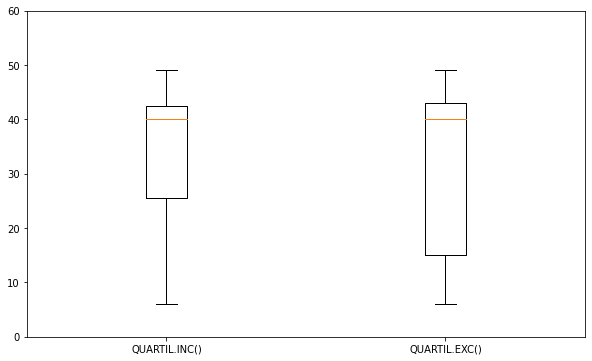

In [7]:
# Criando o canvas
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot() 

# Criando o primeiro cook book, para o método de Tukey
boxplot_data_INC = cbook.boxplot_stats(data)[0]
boxplot_data_INC['label'] = "QUARTIL.INC()"

# Criando o segundo cook book, para o método de M&M
boxplot_data_EXC = cbook.boxplot_stats(data)[0]

# primeiro quartil
boxplot_data_EXC['q1'] = q1
# mediana (embora não seja necessário, pois a mediana é sempre a mesma)
boxplot_data_EXC['med'] = med
# terceiro quartil
boxplot_data_EXC['q3'] = q3
# distância interquartílica
boxplot_data_EXC['iqr'] = iqr
# whiskas inferior (embora não seja necessário, pois neste caso não temos outliers)
boxplot_data_EXC['whislo'] = whislo
# whiskas superior (embora não seja necessário, pois neste caso não temos outliers)
boxplot_data_EXC['whishi'] = whishi
# label
boxplot_data_EXC['label'] = label

# plotando o boxplot Atente que passamos os cook books através de uma list
ax.bxp([boxplot_data_INC, boxplot_data_EXC])
# alterando o intevalo do eixo y para que o gráfico fique um pouco mais próximo ao obtido no Excel.
ax.set_ylim([0,60])
plt.show()

## Comentários

Neste breve artigo, vimos que é bem simples alterar os valores do Boxplot gerado pelo matplotlib. A dificuldade é encontrar o caminho; o caminho é bem simples.

É importante ressaltar a diferença gritante entre os resultados dos dois métodos. Numericamente é possível verificar esta diferença; mas visualmente, ela chega a assustar. Contudo, a conclusão em relação à simetria e a suposição de Normalidade do dados, é a mesma: os dados não são simétricos e não seguem a distribuição Normal.


## Referências 

- Wikipedia contributors. (2021, August 29). Quartile. In Wikipedia, The Free Encyclopedia. Retrieved 13:32, November 25, 2021, from [https://en.wikipedia.org/w/index.php?title=Quartile&oldid=1041261639](https://en.wikipedia.org/).

## Leitura recomendada

- Langford, E. (2006). Quartiles in Elementary Statistics, Journal of Statistics Education, 14(3). Link: [jse.amstat.org/](http://jse.amstat.org/v14n3/langford.html).

- MOORE, D. S. and MCCABE, G. P. (1989), Introduction to the Practice of Statistics, Freeman, First Edition.

- Peltier, J. (2013), Quartiles for Box Plots. Link: [peltiertech.com/](https://peltiertech.com/quartiles-for-box-plots/)

- Tukey, J. W. (1977), Exploratory Data Analysis, Reading, MA: Addison-Wesley.

## Downloads

- Planilha do Excel utilizada para estimar os quartis: 

    + [google drive](https://docs.google.com/spreadsheets/d/1Rb8NoIrNKGHL5FGt8HuXPV90Jn7i67LN/edit?usp=sharing&ouid=115280376883108841355&rtpof=true&sd=true)

    + [github](https://github.com/andersonmdcanteli/random_stuff/blob/main/comparacao_boxplot.xlsx)


## About

**Author:** Anderson Marcos Dias Canteli, *PhD in Food Engineer*

**Last updated on:** 26/11/2021

### Interesting links:

- [GitPage](http://andersonmdcanteli.github.io/)

- [Blog](https://andersoncanteli.wordpress.com/)

- [Dashboads](http://andersoncanteli.herokuapp.com/)

- [Cursos](https://andersonmdcanteli.pythonanywhere.com/courses-landing/)

- [YouTube channel](https://www.youtube.com/c/AndersonCanteli/)

- [Curriculum lattes](http://lattes.cnpq.br/6961242234529344)

<br>

<img style="float: right" src="https://raw.githubusercontent.com/andersonmdcanteli/matplotlib-course/main/logo/marca_puzzle.png" alt="logo Puzzle in a Mug project" width="400">